# Revisiting Python Data Analysis for 2018

## Table of Contents

   1. [Introduction](#intro)
   2. [Resources](#resources)
   3. [Overview of Tools](#overview)
   4. [Numpy](#numpy)
   5. [Pandas](#pandas)
   6. [Xarray](#xarray)
   7. [Astropy](#astropy)
   8. [Dask](#dask)
   9. [Jupyter](#jupyter)
  

## 1. Introduction <a id="intro"></a>

At Pycon 2018 we learned a lot about the current state of data analysis using python.  This mostly came out of attending hands-on tutorials, but we also picked up a lot from talks, and discussing things with attendees (some of whom work in Astronomy).

This talk is our effort to share the important things that we learned so that we might apply them at the GBO. It's meant to be a quick introduction to what we view as the popular tools to consider as we move forward.  How we actually move forward is out of scope for this talk.

## 2. Resources <a id="resources"></a>

This notebook can be found in this repo:

   * git clone /home/sandboxes/pmargani/pycon2018/pmarganiPycon2018
   * cd pmarganiPycon2018
   * createEnv
   * source pycon-env/bin/activate
   * jupyter notebook
   * point your browser to localhost:888


Here are the Pycon 2018 resources we used:

   * [Pycon 2018 Channel](https://www.youtube.com/channel/UCsX05-2sVSH7Nx3zuk3NYuQ)
   * [Pandas for data science tutorial](https://github.com/justmarkham/pycon-2018-tutorial), [video](https://www.youtube.com/watch?v=0hsKLYfyQZc)
   * [DASK tutorial](https://github.com/TomAugspurger/dask-tutorial-pycon-2018), [video](https://www.youtube.com/watch?v=_UWRQZ3nFm0)
   * [Intro to Python for Data Science tutorial](https://github.com/jseabold/pycon-ds-2018), [video](https://www.youtube.com/watch?v=W4WQi2OIy7o&t=94s)
   * [Foundations of Numerical Python tutorial](https://github.com/ssanderson/foundations-of-numerical-computing/tree/master/ansible/files/materials), [video](https://www.youtube.com/watch?v=aGGbnMyeZs0)
   * [Dask and Jupyter Hub talk](https://www.youtube.com/watch?v=Iq72dt1gO9c)
   * [Seven ways to increase performance talk](https://www.youtube.com/watch?v=zQeYx87mfyw)



## 3. Overview of Tools <a id="overview"></a>

Here's a brief overview of the tools we'll disucss, most of which we came across recently at Pycon 2018.  Some of them are familiar to us, while others are fairly new.  We'll go into detail about each one later.

   * Numpy - we all know this package; it's still the foundation.
   * Pandas - providing high-performance, easy-to-use data structures and data analysis tools for Python
   * Xarray -  aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures.
   * Astropy - a common core package for Astronomy in Python
   * Jupyter - what this talk is written in.   Jupyter extends the console-based approach to interactive computing in a qualitatively new direction, providing a web-based application suitable for capturing the whole computation process.
   * fql - pronounced 'fecal'.

## 4. Numpy <a id="numpy"></a>

Pure python can be really slow for computations, especially on lists.  As a gross generalization, this is due to:
   * overhead from dynamic typing
   * overhead associated with each element of the list
   
So, Numpy can get you significant improvements, by 1) defining your data type, 2) removing the overhead from the element to just the list (vectorization).  Here's a simple demo that shows off some Jupyter magic:


In [1]:
# define a function for simply doing the dot product of two vectors
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [5]:


%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end



UsageError: Cell magic `%%fortran` not found.


In [2]:

# create a big list
list_data = [float(i) for i in range(10000000)]

In [13]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 1.15 s, sys: 2 ms, total: 1.15 s
Wall time: 1.3 s


3.333332833337171e+20

In [5]:
# now see how long numpy takes!
import numpy as np
array_data = np.array(list_data)

In [6]:
%%time
array_data.dot(array_data)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 29 ms


3.333332833334263e+20

### Numpy Review

It helps to keep these things in mind when getting the most out of Numpy:
   * don't use for loops - make sure your algorithms are vectorized
   * UFuncs are those fuctions and operations that can get applied across arrays efficiently, like +, -, or accumulate().
   * Selections: you can still use python list slicing, but remember you can also index with boolean array to filter by a predicate (masking) 
   * Reductions - things like np.mean allow us to perform efficient aggregations over arrays
   * Broadcasting - Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are 'compatible'

## 5. Pandas <a id="pandas"></a>

"A high-level tool for doing practical, real world data analysis in Python"

Show me, don't tell me; let's just do some example.

In [15]:
# let's examine some health inspection data using pandas
import pandas as pd
fn = "data/health_inspection_chi.csv"
dta = pd.read_csv(fn)
# we're using pandas DataFrames!
type(dta)


pandas.core.frame.DataFrame

In [16]:
# check this shit out
dta.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,1965287,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
1,5958 W DIVERSEY AVE,TAQUERIA MORELOS,CHICAGO,TAQUERIA MORELOS,Restaurant,2014-02-06T00:00:00.000,1329698,Canvass,41.931250,2099479.0,"{'type': 'Point', 'coordinates': [-87.77590699...",-87.775907,Pass,Risk 1 (High),IL,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,60639.0
2,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,470787,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0
3,2804 N CLARK ST,Wells Street Popcorn,CHICAGO,Wells Street Popcorn,Restaurant,2010-02-01T00:00:00.000,68091,Canvass,41.932921,1954774.0,"{'type': 'Point', 'coordinates': [-87.64515454...",-87.645155,Pass,Risk 2 (Medium),IL,NaN,60657.0
4,2409 N WESTERN AVE,CHICAGO CUPCAKE,CHICAGO,CHICAGO CUPCAKE LLC.,Mobile Food Dispenser,2013-05-03T00:00:00.000,1335320,License Re-Inspection,41.925218,2232391.0,"{'type': 'Point', 'coordinates': [-87.68750659...",-87.687507,Fail,Risk 3 (Low),IL,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,60647.0


In [17]:
# our we can get more general info
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
address            25000 non-null object
aka_name           24709 non-null object
city               24981 non-null object
dba_name           25000 non-null object
facility_type      24787 non-null object
inspection_date    25000 non-null object
inspection_id      25000 non-null int64
inspection_type    25000 non-null object
latitude           24865 non-null float64
license_           24996 non-null float64
location           24865 non-null object
longitude          24865 non-null float64
results            25000 non-null object
risk               24995 non-null object
state              24994 non-null object
violations         23908 non-null object
zip                24990 non-null float64
dtypes: float64(4), int64(1), object(12)
memory usage: 3.2+ MB


In [16]:
# notice that the rows are labeled, but there's no natural index provided by the data as is:
dta.index

RangeIndex(start=0, stop=25000, step=1)

In [18]:
# but we can use the inspection_id as an index, so let's do that
dta = dta.set_index('inspection_id')
dta.index

Int64Index([1965287, 1329698,  470787,   68091, 1335320, 1228169, 1285582,
             557486,   74468, 1522863,
            ...
            2059403,  114871,  657253,  531556,  325228, 2059771, 1965378,
            1490395, 1326565,  413268],
           dtype='int64', name='inspection_id', length=25000)

In [19]:
dta.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
inspection_id,,,,,,,,,,,,,,,,
1965287,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
1329698,5958 W DIVERSEY AVE,TAQUERIA MORELOS,CHICAGO,TAQUERIA MORELOS,Restaurant,2014-02-06T00:00:00.000,Canvass,41.931250,2099479.0,"{'type': 'Point', 'coordinates': [-87.77590699...",-87.775907,Pass,Risk 1 (High),IL,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,60639.0
470787,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0
68091,2804 N CLARK ST,Wells Street Popcorn,CHICAGO,Wells Street Popcorn,Restaurant,2010-02-01T00:00:00.000,Canvass,41.932921,1954774.0,"{'type': 'Point', 'coordinates': [-87.64515454...",-87.645155,Pass,Risk 2 (Medium),IL,NaN,60657.0
1335320,2409 N WESTERN AVE,CHICAGO CUPCAKE,CHICAGO,CHICAGO CUPCAKE LLC.,Mobile Food Dispenser,2013-05-03T00:00:00.000,License Re-Inspection,41.925218,2232391.0,"{'type': 'Point', 'coordinates': [-87.68750659...",-87.687507,Fail,Risk 3 (Low),IL,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,60647.0


In [20]:
# access columns two ways:
dta.address
dta['address']

inspection_id
1965287                     5255 W MADISON ST 
1329698                   5958 W DIVERSEY AVE 
470787                   5400-5402 N CLARK ST 
68091                         2804 N CLARK ST 
1335320                    2409 N WESTERN AVE 
1228169    3481 S DR MARTIN LUTHER KING JR DR 
1285582              3201-3203 W ARMITAGE AVE 
557486              5215 W CHICAGO AVE BLDG E2
74468                    4445 S Drexel (900E) 
1522863               3958 N NARRAGANSETT AVE 
1365288                   10-20 E DELAWARE ST 
1150454                   10123 S WESTERN AVE 
1453434                     81 E VAN BUREN ST 
1098457                 3615 W IRVING PARK RD 
1978957                       3042 N BROADWAY 
1971125                 3658 W IRVING PARK RD 
1434561                        932 N NOBLE ST 
606496                   9440 S LAFAYETTE AVE 
1322114                   2822 W MONTROSE AVE 
1434800                     4140 W Addison ST 
1096484                        701 S STATE ST 

In [22]:
# that's a Series
type(dta.address)


pandas.core.series.Series

We can access rows in a DataFrame two ways:
   * `loc` does label-based indexing
   * `iloc` does integer-based indexing

In [21]:
dta.loc[[1965287, 470787]]

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
inspection_id,,,,,,,,,,,,,,,,
1965287,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
470787,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0


In [26]:
dta.iloc[[0,2]]

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
inspection_id,,,,,,,,,,,,,,,,
1965287,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
470787,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0


That's data selection; how about cleaning up this data?  Like changing the inspection_date column from a string (object) to an actual datetime?

In [27]:
dta.dtypes

address             object
aka_name            object
city                object
dba_name            object
facility_type       object
inspection_date     object
inspection_type     object
latitude           float64
license_           float64
location            object
longitude          float64
results             object
risk                object
state               object
violations          object
zip                float64
dtype: object

In [22]:
dta.inspection_date = dta.inspection_date.apply(pd.to_datetime)
dta.dtypes

address                    object
aka_name                   object
city                       object
dba_name                   object
facility_type              object
inspection_date    datetime64[ns]
inspection_type            object
latitude                  float64
license_                  float64
location                   object
longitude                 float64
results                    object
risk                       object
state                      object
violations                 object
zip                       float64
dtype: object

In [32]:
dta.inspection_date

inspection_id
1965287   2016-09-26
1329698   2014-02-06
470787    2010-12-03
68091     2010-02-01
1335320   2013-05-03
1228169   2013-09-16
1285582   2012-09-27
557486    2011-08-11
74468     2010-05-26
1522863   2015-02-10
1365288   2013-09-26
1150454   2012-06-11
1453434   2014-07-21
1098457   2012-07-20
1978957   2017-01-05
1971125   2016-11-09
1434561   2014-04-04
606496    2011-11-18
1322114   2013-03-05
1434800   2014-04-14
1096484   2012-08-28
1360289   2013-08-15
1448016   2015-10-01
250608    2010-06-07
1324353   2013-03-12
468107    2010-12-01
1948939   2016-08-08
1751612   2016-04-07
606575    2012-02-03
68160     2010-02-04
             ...    
347209    2010-07-26
1975445   2016-11-15
1326783   2013-04-08
1975775   2016-11-21
612615    2012-01-04
197247    2010-02-03
413579    2010-09-17
2049615   2017-05-02
1230080   2012-07-13
1393310   2014-02-27
1946768   2016-07-18
529379    2011-11-04
1464890   2015-05-08
1182230   2012-04-03
1966555   2016-10-17
1522771   2015-02-09

In [42]:
# we want to use the methods provided by pandas to work with this data
dta.inspection_date.dt.month

inspection_id
1965287     9
1329698     2
470787     12
68091       2
1335320     5
1228169     9
1285582     9
557486      8
74468       5
1522863     2
1365288     9
1150454     6
1453434     7
1098457     7
1978957     1
1971125    11
1434561     4
606496     11
1322114     3
1434800     4
1096484     8
1360289     8
1448016    10
250608      6
1324353     3
468107     12
1948939     8
1751612     4
606575      2
68160       2
           ..
347209      7
1975445    11
1326783     4
1975775    11
612615      1
197247      2
413579      9
2049615     5
1230080     7
1393310     2
1946768     7
529379     11
1464890     5
1182230     4
1966555    10
1522771     2
626394      2
120509      6
604507     11
1184322     5
2059403     6
114871      4
657253      9
531556      9
325228      7
2059771     6
1965378     9
1490395     7
1326565     3
413268      9
Name: inspection_date, Length: 25000, dtype: int64

In [34]:
# take a look at the results column:
dta.results

inspection_id
1965287    Pass w/ Conditions
1329698                  Pass
470787                   Fail
68091                    Pass
1335320                  Fail
1228169                  Pass
1285582    Pass w/ Conditions
557486                   Pass
74468                    Pass
1522863                  Pass
1365288                  Pass
1150454    Pass w/ Conditions
1453434                  Pass
1098457                  Pass
1978957                  Pass
1971125                  Pass
1434561                  Pass
606496                   Pass
1322114                  Pass
1434800                  Pass
1096484                  Pass
1360289                  Pass
1448016                  Fail
250608                   Pass
1324353    Pass w/ Conditions
468107                   Fail
1948939                  Pass
1751612                  Fail
606575                   Fail
68160                    Fail
                  ...        
347209                   Pass
1975445                  F

In [23]:
# this obviously contains a set of pre-determined values (not free form strings)
# check out how we can see that:
dta.results.value_counts()

Pass                    15915
Fail                     5760
Pass w/ Conditions       2931
Out of Business           246
No Entry                  107
Not Ready                  40
Business Not Located        1
Name: results, dtype: int64

In [24]:
# pretty cool, huh!  So why not treat some of these
# columns like categories:
dta.results = dta.results.astype('category')
dta.select_dtypes(['category'])

,results
inspection_id,
1965287,Pass w/ Conditions
1329698,Pass
470787,Fail
68091,Pass
1335320,Fail
1228169,Pass
1285582,Pass w/ Conditions
557486,Pass
74468,Pass


OK, now that we see how that works, let's do some data exploration.  We have health inspection code, so 
where are the best and worst places to eat?

In [26]:
r = dta.groupby(dta.results).dba_name.value_counts()
r["Fail"].sort_values(ascending=False)

dba_name
SUBWAY                                                  42
DUNKIN DONUTS                                           33
MCDONALD'S                                              20
HAROLD'S CHICKEN SHACK                                  14
CHIPOTLE MEXICAN GRILL                                  11
DUNKIN DONUTS / BASKIN ROBBINS                          10
MCDONALDS                                                9
POTBELLY SANDWICH WORKS LLC                              9
POTBELLY SANDWICH WORKS                                  9
7-ELEVEN                                                 9
JIMMY JOHNS                                              8
LAS ISLAS MARIAS                                         8
KFC                                                      7
PIZZA HUT                                                7
FRESHII                                                  6
SHARKS FISH & CHICKEN                                    6
OLD COUNTRY BUFFET                             

In [27]:
# now that's not too fair to subway, so what's the fail/pass ratio for subways?
grouper = dta.groupby(dta.dba_name)
subway = grouper.get_group("SUBWAY")
subway.results.value_counts()['Fail'] / subway.results.value_counts()['Pass']

0.1917808219178082

## 6. Xarray <a id="xarray"></a>

xarray (formerly xray) is an open source project and Python package that aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures.

When we asked people what we should be using, of course, Astropy came up, but the nature of astronomical data lead people to recommend Xarray to us.  Below we have some fake weather data as an example.

In [2]:
import numpy as np
np.random.randn(2,2)

array([[-0.60067372,  1.04942183],
       [ 0.54586996,  0.27583484]])

In [5]:
# Taken from xarray examples: some Toy Weather data
# https://xarray.pydata.org/en/stable/examples/weather-data.html
import numpy as np
import pandas as pd
import seaborn as sns  # pandas aware plotting library

import xarray as xr

np.random.seed(123)

# our time axis comes from pandas: 2 years worth of days
times = pd.date_range('2000-01-01', '2001-12-31', name='time')

# our base data comes from numpy
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))
base = 10 + 15 * annual_cycle.reshape(-1, 1)

# random variations of the base data representing the min and max temperatures for that time.
# the shape will be (length of times, number of locations)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)


# now we create our xarray Dataset:
# the data is a dictionary, with each key of the form:
#   tuple of (dimensions, data)
# the dimensions are defined next: 
#   * one axis is our time dimension, with the supplied time values
#   * the other axis is our locations (states)
ds = xr.Dataset({'tmin': (('time', 'location'), tmin_values),
                 'tmax': (('time', 'location'), tmax_values)},
                {'time': times, 'location': ['IA', 'IN', 'IL']})
# we can assign some meta data that xarray ignores
ds.attrs['version'] = '1.0'
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * location  (location) <U2 'IA' 'IN' 'IL'
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...
Attributes:
    version:  1.0

In [9]:
# we can work with a pandas dataframe if we like
df = ds.to_dataframe()
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


tmin       tmax
location time                            
IA       2000-01-01  -8.037369  12.980549
         2000-01-02  -9.341157   0.447856
         2000-01-03 -12.139719   5.322699
         2000-01-04  -7.492914   1.889425
         2000-01-05  -0.447129   0.791176

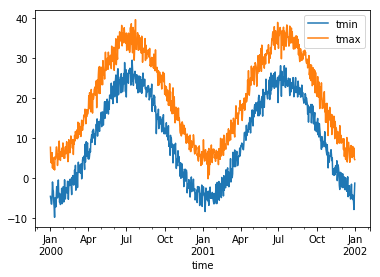

In [10]:
# now let's take the mean across locations, and plot
# this pandas dataframe against time:
ds.mean(dim='location').to_dataframe().plot()

In [9]:
ds.data_vars

Data variables:
    tmin     (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax     (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...

In [15]:
# Let's have more fun, let's plot the probability of freezing for each month.
# first, like with pandas and numpy, we filter the xarray data set by 
# freezing min. temperature.
# then we group those results by month.
# then we calculate the mean temp. over time (?)
# how is this producing a probability?  I'm lost :)
freeze = (ds['tmin'] <= 0).groupby('time.month').mean('time')
freeze

<xarray.DataArray 'tmin' (month: 12, location: 3)>
array([[0.951613, 0.887097, 0.935484],
       [0.842105, 0.719298, 0.77193 ],
       [0.241935, 0.129032, 0.16129 ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.016129, 0.      ],
       [0.333333, 0.35    , 0.233333],
       [0.935484, 0.854839, 0.822581]])
Coordinates:
  * location  (location) <U2 'IA' 'IN' 'IL'
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

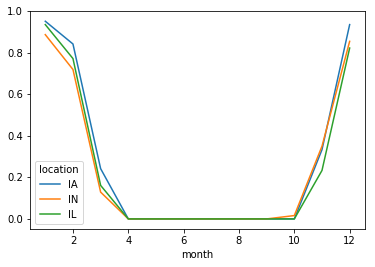

In [12]:
freeze.to_pandas().plot()

## 7. Astropy <a id="astropy"></a>

## 8. Dask <a id="dask"></a>

Dask is a parallel computing library that scales the existing Python ecosystem. Dask can scale down to your laptop laptop and up to a cluster. 

### Dask Delayed

Here we parallelize simple for-loop style code with Dask and dask.delayed.  This is a simple way to use dask to parallelize existing codebases or build complex systems.

In [53]:
from time import sleep

# make some functions that take time

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [29]:
%%time
# this takes 3 seconds to run because we call each
# function sequentially, one after the other
x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 3 s


In [30]:
from dask import delayed

In [31]:
%%time
# this runs immediately, all it does is build a task graph
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1e+03 µs, sys: 0 ns, total: 1e+03 µs
Wall time: 981 µs


In [32]:
%%time
# now we run it using a local thread pool
z.compute()

CPU times: user 5 ms, sys: 3 ms, total: 8 ms
Wall time: 2.04 s


5

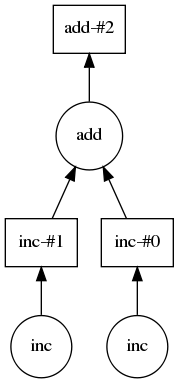

In [33]:
# why only 2 seconds?  We can see the task graph we made
z.visualize()

In [34]:
%%time
# here's a more complicated example w/ out Dask
data = range(8)
results = []
for x in data:
    y = inc(x)
    results.append(y)
total = sum(results)    

CPU times: user 6 ms, sys: 1 ms, total: 7 ms
Wall time: 8 s


In [54]:
%%time
# here's the Dask version
# TBF: on my machine this only 1/2's the time; why?
from dask import delayed
data = range(8)
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
total = delayed(sum)(results)
total.compute()
total.visualize()

CPU times: user 330 ms, sys: 57 ms, total: 387 ms
Wall time: 4.24 s


In [56]:
total.visualize?


Lets's do a more complicated real world example.  We'll work with pandas to examine some flight data.  First, let's take a look at the structure of the data in pandas:

In [37]:
import os
sorted(os.listdir(os.path.join('data', 'nycflights')))

['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv']

In [38]:


import pandas as pd
df = pd.read_csv(os.path.join('data', 'nycflights', '1990.csv'))
df.head()



,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271539 entries, 0 to 271538
Data columns (total 23 columns):
Year                 271539 non-null int64
Month                271539 non-null int64
DayofMonth           271539 non-null int64
DayOfWeek            271539 non-null int64
DepTime              267645 non-null float64
CRSDepTime           271539 non-null int64
ArrTime              266584 non-null float64
CRSArrTime           271539 non-null int64
UniqueCarrier        271539 non-null object
FlightNum            271539 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    266584 non-null float64
CRSElapsedTime       271539 non-null int64
AirTime              0 non-null float64
ArrDelay             266584 non-null float64
DepDelay             267645 non-null float64
Origin               271539 non-null object
Dest                 271539 non-null object
Distance             270225 non-null float64
TaxiIn               0 non-null float64
TaxiOut              0 

In [54]:
# Calculate the mean depatrue delay per-airport for this year
df.groupby('Origin').DepDelay.mean()

Delayed('mean-2859b10e-a2b2-4860-803e-cafdccce916f')

Now we would like to do the same thing as above, but taking all years (files) into account.  Here's the straight forward, serial way to do that: 

In [40]:
from glob import glob
filenames = sorted(glob(os.path.join('data', 'nycflights', '*.csv')))

In [56]:


%%time

sums = []
counts = []
for fn in filenames:
    # Read in file
    df = pd.read_csv(fn)
    
    # Groupby origin airport
    by_origin = df.groupby('Origin')
    
    # Sum of all departure delays by origin
    total = by_origin.DepDelay.sum()
    
    # Number of flights by origin
    count = by_origin.DepDelay.count()
    
    # Save the intermediates
    sums.append(total)
    counts.append(count)

# Combine intermediates to get total mean-delay-per-origin
total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights



CPU times: user 9.29 s, sys: 203 ms, total: 9.49 s
Wall time: 10.7 s


In [57]:
# remember that mean is not a float
print(type(mean))
mean

<class 'pandas.core.series.Series'>


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [43]:
total_delays

Origin
EWR    11731182.0
JFK     4422520.0
LGA     7239916.0
Name: DepDelay, dtype: float64

In [ ]:
Now let us speed it up by using delay just once on each file read.

In [59]:
%%time

from dask import compute

sums = []
counts = []
for fn in filenames:
    # Read in file
    df = delayed(pd.read_csv)(fn)
    
    # Groupby origin airport
    by_origin = df.groupby('Origin')
    
    # Sum of all departure delays by origin
    total = by_origin.DepDelay.sum()
    
    # Number of flights by origin
    count = by_origin.DepDelay.count()
    
    # Save the intermediates
    sums.append(total)
    counts.append(count)

# compute intermediates
#sums, counts = compute(sums, counts)

# Combine intermediates to get total mean-delay-per-origin
total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights
mean.compute()


CPU times: user 8.85 s, sys: 429 ms, total: 9.28 s
Wall time: 5.74 s


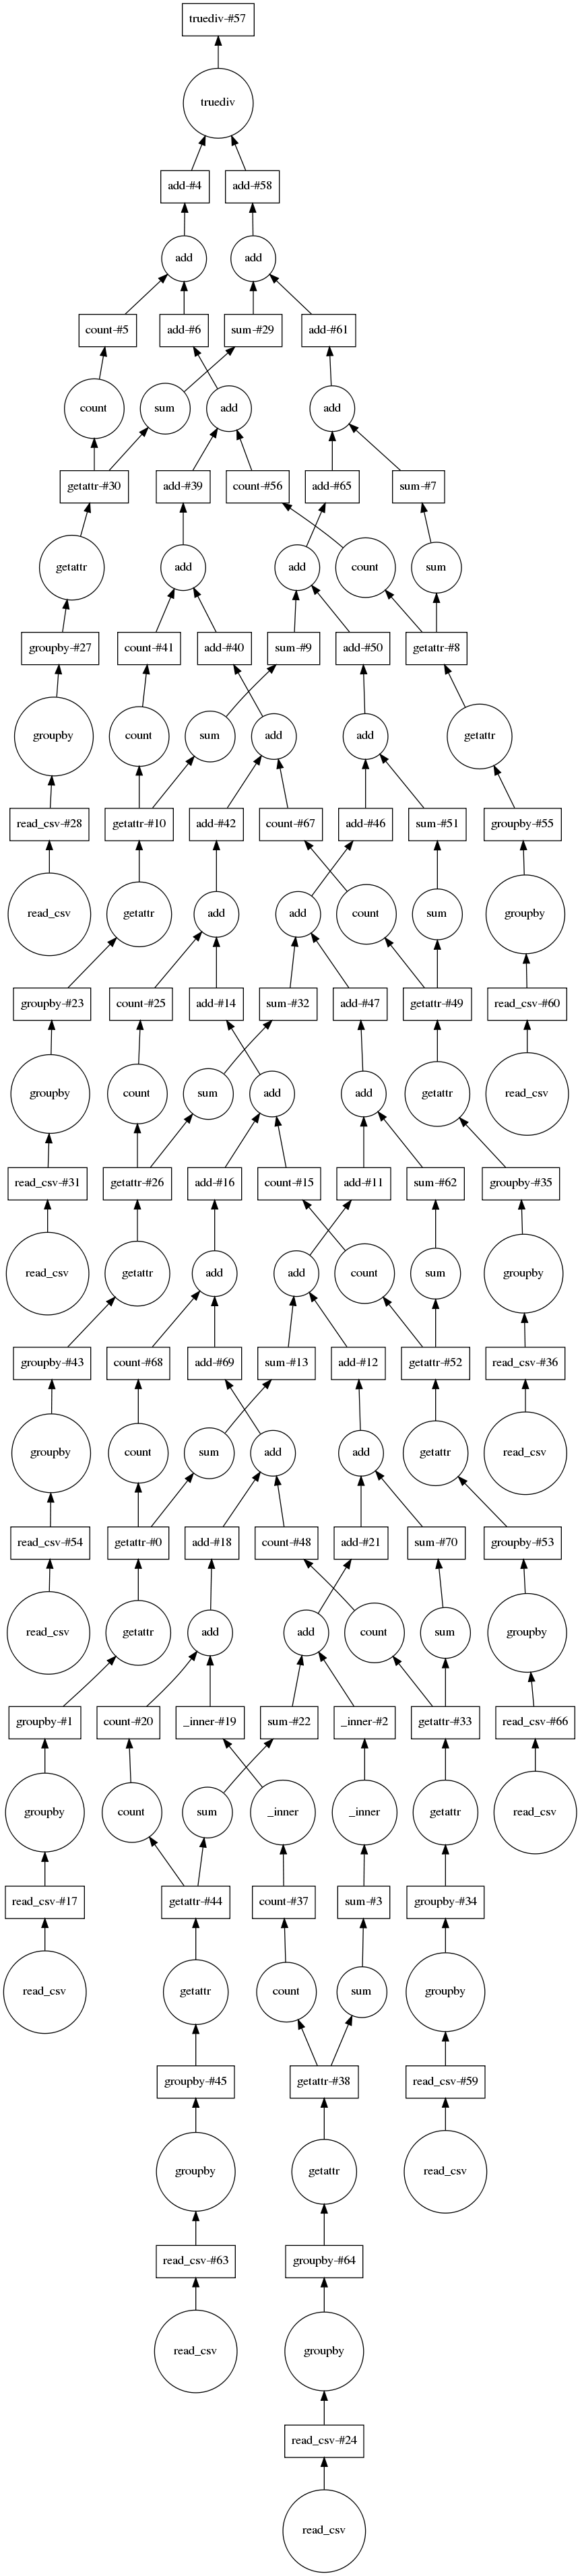

In [60]:
# lets checkout the task graph
mean.visualize() #(filename='dask.pdf')



### Dask Arrays

Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms. Simply put: distributed Numpy.

A **blocked algorithm** executes on a large dataset by breaking it up into small blocks.

For example, consider taking the sum of a billion numbers. We might instead break up the array into 1,000 chunks, each of size 1,000,000, take the sum of each chunk, and then take the sum of the intermediate sums.

In [63]:
%%time
# here we have a big chunk of random numbers, and we want to compute the mean of a subset of data;
# see how it performs w/ just numpy, but keep an eye on your memory!
sz=10000
x = np.random.normal(10, 0.1, size=(sz, sz)) 
y = x.mean(axis=0)[::100] 
print(y)

[ 9.99843949 10.00017788 10.00034975 10.00121588 10.00096693  9.9984837
 10.00108086 10.00007605  9.99974959  9.99982595 10.00145396  9.9995396
 10.00068163 10.00058124  9.99969718  9.99886208  9.99917814  9.99971493
  9.99992794  9.9996322   9.99661827 10.00094985 10.00170368  9.99978472
 10.00252558 10.0000699  10.00001992 10.00004254  9.99921832 10.00216738
 10.00170913 10.00009216 10.00038594 10.00087148  9.99938843  9.99953433
  9.99936221  9.99975221 10.00091616 10.00130949  9.99788674  9.99823394
  9.99968346  9.99973046 10.00040482 10.00108512  9.99920377 10.0015384
  9.99909646  9.99958414  9.99952463  9.99875883  9.99937485 10.0008335
  9.9969742  10.00099506 10.00086984 10.00063569  9.99965395  9.99857863
  9.99900662 10.00016276 10.00052183  9.99931652  9.99995253 10.00085047
 10.00137308 10.00232971  9.9987469  10.00081932  9.99982986 10.00081763
 10.00047321 10.00007891 10.00020022  9.99912232 10.00009074 10.00094678
  9.99973615 10.00068567  9.99998866 10.00090162  9.999

In [65]:
%%time
import dask.array as da
# now check out the performance improvement here;
# note that we are using dask's mean method, which doesn't actually do
# anything yet.  Once again, the call to compute() triggers it.
x = da.random.normal(10, 0.1, size=(sz, sz), chunks=(1000, 1000))
y = x.mean(axis=0)[::100] 
y.compute() 
print(y)

dask.array<getitem, shape=(200,), dtype=float64, chunksize=(10,)>
CPU times: user 30.1 s, sys: 670 ms, total: 30.7 s
Wall time: 30.6 s


In [69]:
from os import cpu_count
cpu_count()

2

Notice that in the Numpy example (first), the CPU and Wall times were more or less the same.  But when using Dask, the CPU time actually went up, while it was faster.  This was due to the parallelization that happened.  Also note the chunk size realtive to the size of the data.  There is a sweet spot for the chunk size: if it's too close to the size of the data, then you're back to the Numpy example, and if it's too small, it could be much slower, due to all the overhead.

#### Real World Example:

There is 2GB of somewhat artifical weather data in HDF5 files in data/weather-big/*.hdf5. We'll use the h5py library to interact with this data and dask.array to compute on it.

Our goal is to visualize the average temperature on the surface of the Earth for this month. This will require a mean over all of this data. We'll do this in the following steps

    * Create h5py.Dataset objects for each of the days of data on disk (dsets)
    * Wrap these with da.from_array calls
    * Stack these datasets along time with a call to da.stack
    * Compute the mean along the newly stacked time axis with the .mean() method
    * Visualize the result with matplotlib.pyplot.imshow



In [2]:

import h5py
from glob import glob
import os

filenames = sorted(glob(os.path.join('/home/scratch/pmargani/tmp', 'weather-big', '*.hdf5')))
print(filenames)
dsets = [h5py.File(filename, mode='r')['/t2m'] for filename in filenames]
dsets[0]



/home/sandboxes/pmargani/pycon2018/pmarganiPycon2018/pycon-env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['/home/scratch/pmargani/tmp/weather-big/2014-01-01.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-02.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-03.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-04.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-05.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-06.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-07.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-08.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-09.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-10.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-11.hdf5', '/home/scratch/pmargani/tmp/weather-big/2014-01-12.hdf5']


<HDF5 dataset "t2m": shape (5760, 11520), type "<f8">

In [5]:
dsets[0][:5, :5]  # Slicing into h5py.Dataset object gives a numpy array

array([[22.53240967, 23.89801025, 25.26361084, 26.62921143, 27.99481201],
       [23.89801025, 25.34637451, 26.79473877, 28.24310303, 29.69146729],
       [25.26361084, 26.79473877, 28.3258667 , 29.85699463, 31.38812256],
       [26.62921143, 28.24310303, 29.85699463, 31.47088623, 33.08477783],
       [27.99481201, 29.69146729, 31.38812256, 33.08477783, 34.78143311]])

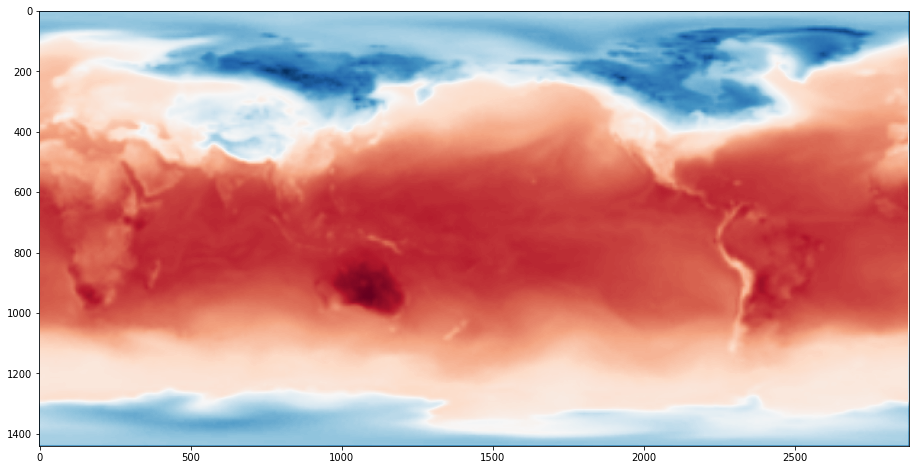

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
plt.imshow(dsets[0][::4, ::4], cmap='RdBu_r')



KeyboardInterrupt: 

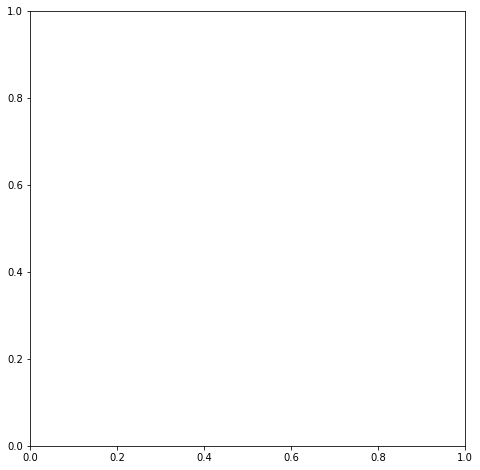

In [8]:
%matplotlib inline

# now ingest ALL the data with help from DASK.
# First make dask arrays from each data set
import dask.array as da
import matplotlib.pyplot as plt

arrays = [da.from_array(dset, chunks=(500, 500)) for dset in dsets]



# Stack this list of dask.array objects into a single dask.array object with da.stack
# Stack these along the first axis so that the shape of the resulting array is (31, 5760, 11520).

x = da.stack(arrays, axis=0)

# now plot the mean
result = x.mean(axis=0)
fig = plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='RdBu_r')


### Dask Schedulers

We've been using a default scheduler to run our task graphs so far.  But you can optionally define which one you want to use: a single threaded one for debugging, a multi-process, or a distributed scheduler.

In [17]:
# The distributed scheduler comes with an amazing status UI, which I never got 
# to work.  This code should include a link to a pretty impressive 'Dashboard', but does not.
from dask.distributed import Client
client = Client()
client.cluster

## 9. Jupyter <a id="jupyter"></a>

You are looking at this in a Jupyter Notebook.  You can get a single-user server setup pretty quickly for this.  Simply install jupyter in your virtual env., and then run 'jupyter notebook'.  Go to localhost:8888 by default and you're off.  That's how I got this notebook started.

But sharing that new notebook is a little more complicated.  Right now I'm trying to get this done by installing Jupyter Hub.  That works, but still haven't figured out how to share, so currently we've just got a git repo for this notebook and it's required python environment.

In [24]:
    fn = "2018_04_22_11:55:26"
    proj = "AGBT17B_429_07"

In [20]:
info = getVegasInfo(proj, fn, 7)

NameError: name 'getVegasInfo' is not defined

In [22]:
%load -s getVegasInfo decodeVegas.py 

ERROR:root:Unable to parse the input as valid Python code


In [35]:
import os
import glob
import pyfits

def getVegasBankInfo(bank, path):

    f = path + bank + ".fits"
    #print("opening: ", f)
    hdus = pyfits.open(f)
    nchan = hdus[0].header['NCHAN']
    crpix1 = hdus[4].header['CRPIX1']

    numPhases = int(hdus[5].header['NAXIS2'])
    numInts = int(hdus[6].header['NAXIS2'])
    samplers = hdus[4].data
    samplerInfo = [(s[1], s[5], s[6], s[7], s[8]) for s in samplers]
    return {
        'numchans': nchan, 
        'samplers' : samplerInfo, 
        'crpix1': crpix1,
        'numPhases': numPhases,
        'numInts': numInts,
    }

def getVegasInfo(path, fn, scanNum):
    
    # how many banks?
    path = os.path.join(path, 'VEGAS', fn)
    print("Looking for: ", path)
    files = glob.glob(path+"*")
    # print files
    banks = sorted([f.split('.')[0][-1] for f in files])

    print("banks: ", banks)

    info = {}
    for bank in banks:
        info[bank] = getVegasBankInfo(bank, path)

    return info



In [39]:
%%time
fn = "2018_04_22_11:55:26"
proj = "AGBT17B_429_07"
path = "/home/scratch/pmargani/lustre/" + proj
info = getVegasInfo(path, fn, 7)

Looking for:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26
banks:  ['A', 'B', 'C', 'D', 'E']
CPU times: user 137 ms, sys: 18 ms, total: 155 ms
Wall time: 273 ms


In [40]:
info

{'A': {'crpix1': 4097.0,
  'numInts': 8,
  'numPhases': 2,
  'numchans': 8192,
  'samplers': [(1, 0, 988586425.78125, 2861.02294921875, 2861.02294921875),
   (2, 0, 988586425.78125, 2861.02294921875, 2861.02294921875),
   (1, 1, 948852539.0625, 2861.02294921875, 2861.02294921875),
   (2, 1, 948852539.0625, 2861.02294921875, 2861.02294921875),
   (1, 2, 884399414.0625, 2861.02294921875, 2861.02294921875),
   (2, 2, 884399414.0625, 2861.02294921875, 2861.02294921875),
   (1, 3, 781494140.625, 2861.02294921875, 2861.02294921875),
   (2, 3, 781494140.625, 2861.02294921875, 2861.02294921875),
   (1, 4, 700744628.90625, 2861.02294921875, 2861.02294921875),
   (2, 4, 700744628.90625, 2861.02294921875, 2861.02294921875),
   (1, 5, 685180664.0625, 2861.02294921875, 2861.02294921875),
   (2, 5, 685180664.0625, 2861.02294921875, 2861.02294921875),
   (1, 6, 567260742.1875, 2861.02294921875, 2861.02294921875),
   (2, 6, 567260742.1875, 2861.02294921875, 2861.02294921875),
   (1, 7, 511413574.21875

In [48]:
# %load decodeVegas.py
import os
import pyfits
import glob
import numpy
import math
import matplotlib.pyplot as plt
import sys
import argparse

def plotData(y, projName, scanNum, beam, pol, ifNum, integration, phaseIndex):
    "Really basic plot of raw power vs. channels"

    # we don't care about x right now
    x = numpy.arange(0, len(y))
    plt.plot(x, y)

    # whatever info is easy to obtain, print
    plt.xlabel('index')
    plt.ylabel('?')
    # projName = projPath.split('/')[-1]
    title = '%s_%s_%d_%s_%d_%d_%d' % \
        (projName, scanNum, beam, pol, ifNum, integration, phaseIndex)
    plt.title(title)
    plt.show()
    plt.savefig(title)
    plt.close()

def getIFInfo(path, fn, scanNum):


    f = os.path.join(path, 'IF', fn+".fits")
    #print "Opening: ", f
    hdus = pyfits.open(f)
    
    # print hdus[0].header
    assert int(hdus[0].header['SCAN']) == scanNum

    allIFData = hdus[1].data

    beMask = allIFData.field('backend') == 'VEGAS'
    beData = allIFData[beMask]

    # print "len(beData)", len(beData)

    #bankNames = list(set(beData.field('bank').tolist()))
    #bankNames = [b.strip() for b in bankNames]

    #banks = {}
    #for bname in bankNames:
    #    banks[bname] = []
    #    for data in beData:
    #        print "data[0]", data[1]
#
    #        if data[1].strip() == bname:
    #            banks[bname].append(data)
    ports = {}
    for data in beData:
        bank = data[1].strip()
        port = str(data[2])
        name = bank + port
        ports[name] = data

    feeds = list(set(beData.field('feed').tolist()))
    pols = list(set(beData.field('polarize').tolist()))
    pols = [pol.strip() for pol in pols]
    
    # TBF: how do we get 32 IF windows out of this?
    #bws = beData.field('bandwdth').tolist()
    #fs = beData.field('center_sky').tolist()
    #ifTunings = []
    #for bw in bws:
    #    for f in fs:
    #        tun = float(bw) * float(f)
    #        if tun not in ifTunings:
    #            print "sky: %.2E, bw: %.2E" % (f, bw)
    #            ifTunings.append(tun)

    #print len(ifTunings), ifTunings

    return (ports, feeds, pols)

def getVegasBankInfo(bank, path):

    f = path + bank + ".fits"
    #print "opening: ", f
    hdus = pyfits.open(f)
    nchan = hdus[0].header['NCHAN']
    crpix1 = hdus[4].header['CRPIX1']

    numPhases = int(hdus[5].header['NAXIS2'])
    numInts = int(hdus[6].header['NAXIS2'])
    samplers = hdus[4].data
    samplerInfo = [(s[1], s[5], s[6], s[7], s[8]) for s in samplers]
    return {
        'numchans': nchan, 
        'samplers' : samplerInfo, 
        'crpix1': crpix1,
        'numPhases': numPhases,
        'numInts': numInts,
    }


def getVegasInfo(path, fn, scanNum):
    
    # how many banks?
    path = os.path.join(path, 'VEGAS', fn)
    # print "Looking for: ", path
    files = glob.glob(path+"*")
    # print files
    banks = sorted([f.split('.')[0][-1] for f in files])

    #print "banks: ", banks

    info = {}
    for bank in banks:
        #f = path + bank + ".fits"
        #print "opening: ", f
        #hdus = pyfits.open(f)
        #nchan = hdus[0].header['NCHAN']
        #crpix1 = hdus[4].header['CRPIX1']
#
#        numPhases = int(hdus[5].header['NAXIS2'])
        #numInts = int(hdus[6].header['NAXIS2'])

        #samplers = hdus[4].data
        #samplerInfo = [(s[1], s[5], s[6], s[7], s[8]) for s in samplers]
        #info[bank] = { 
        #    'numchans': nchan, 
        #    'samplers' : samplerInfo, 
        #    'crpix1': crpix1,
        #    'numPhases': numPhases,
        #    'numInts': numInts,
        #}
        info[bank] = getVegasBankInfo(bank, path)

    return info

def getAvgLO1Freq(path, fn, lo, scanNum):

    f = os.path.join(path, lo, fn+".fits")
    # print "Opening: ", f
    hdus = pyfits.open(f)
    
    assert int(hdus[0].header['SCAN']) == scanNum

    return numpy.mean(hdus[3].data.field('LO1FREQ'))

# def getRawData(1, 'R', 1.9753832575013677e+17, 0, 0, dataMap, vegasPath)
def getRawData(beam, pol, ifTuning, integration, phaseIndex, dataMap, vegasPath, fn):

    if not dataMap.has_key((beam, pol, ifTuning)):
        #print "*** Missing Key", beam, pol, ifTuning
        #print ""
        return []

    # use the data map to get the file location of the data
    bank, port, subband = dataMap[(beam, pol, ifTuning)]
    #print "Getting data from: ", bank, port, subband

    portPos = (subband * 2) + (port - 1)

    # open this file
    f = os.path.join(vegasPath, 'VEGAS', fn + bank + ".fits")

    hdus = pyfits.open(f)

    data = hdus[6].data.field('DATA')[integration]

    # print "got data of len:", len(data)

    # make sure your assumptions about the data structure is correct
    tdim3 = hdus[6].header['TDIM3']
    # print "tdim3", tdim3
    parts = tdim3[1:-1].split(',')
    dims = [int(p) for p in parts]
    numChans = dims[0]
    numPorts = dims[1]
    numPhases = dims[2]
    assert (numChans * numPorts * numPhases) == len(data)
    assert phaseIndex < numPhases
    assert portPos <= numPorts

    phaseSize = len(data) / numPhases 
    portSize = numChans

    dStart = (portPos * portSize) + (phaseIndex * phaseSize)
    dEnd = dStart + numChans

    print("Retrieve spectra from %d to %d" % (dStart, dEnd))
    return data[dStart:dEnd]


def main(proj, fn, scanNum):


    # first gather all the info we need
    vegasPath = "/lustre/gbtdata"
    projPath = "/home/gbtdata"
    # proj = "AGBT17B_429_07"

    dataPath = os.path.join(projPath, proj)
    vegasPath = os.path.join(vegasPath, proj)

    # just from this specific scan
    # scanNum = 7
    # fn = "2018_04_22_11:55:26"

    # Stage I: gather info we need from the FITS files
    ifPorts, feeds, pols = getIFInfo(dataPath, fn, scanNum)

    #print "feeds (beams): ", feeds
    #print "pols: ", pols

    vegasInfo = getVegasInfo(vegasPath, fn, scanNum)

    lo1freq = getAvgLO1Freq(dataPath, fn, "LO1A", scanNum)

    # Stage II: create a map from physical attributes to its' data

    # now that we've opened FITS files and gathered info,
    # lets find out how many unique IFs, or spectral windows, we have
    centerSkys = []
    IFTunings = []
    IFValues = []
    ifNum = -1

    # we need to create a mapping from physical attributes, to data locations
    dataMap = {}

    # loop through each bank
    for bank, info in vegasInfo.items():

        # get the basic info for this vegas bank
        print("Bank: ", bank)
        numchan = info['numchans']
        cprx = info['crpix1']
        numPhases = info['numPhases']
        numInts = info['numInts']
        print("Num Phases: ", numPhases)
        print("Num Integrations: ", numInts)


        # for this bank, loop through the info from it's SAMPLER table.
        # each row of this table will have a corresponding chunk of the 
        # DATA.DATA field.
        for port, subband, crval1, cdelt1, freqres in info['samplers']:

            # find matching IF info for this particular Bank and Port,
            # so we know what beam and polarization each one is
            for bankPort, ifInfo in ifPorts.items(): 
                pBank = bankPort[0]
                pPort = bankPort[1]
                if (bank == pBank) and (int(pPort) == int(port)):
                    feed = ifInfo[4]
                    pol = ifInfo[7]
                    # figure out the frequency info; this is non-trivial!
                    bw = cdelt1 * numchan
                    # frequency start and end is from Vegas.Sampler table
                    fStart = crval1 + cdelt1 * (1. - cprx)
                    fEnd = crval1 + cdelt1 * (numchan - cprx + 1.)
                    # but sky freq formulat stuff is from if port info
                    sffMulti = ifInfo[20]
                    sffSideband = ifInfo[21]
                    sffOffset = ifInfo[22]
                    # SFF
                    skyStart = (sffSideband * fStart) + (sffMulti * lo1freq) + sffOffset
                    skyEnd = (sffSideband * fEnd) + (sffMulti * lo1freq) + sffOffset
                    # quick and dirty way to get this - formal way is to use the
                    # frequency axis (see vegas code)
                    centerSky = (skyEnd + skyStart) / 2.0
                    # this product is the unique value we use for enumerating
                    ifTuning = bw * centerSky

                    if ifTuning not in IFTunings:
                        IFTunings.append(ifTuning)
                        IFValues.append((centerSky, bw))
                        ifNum += 1
                    else:
                        ifNum = IFTunings.index(ifTuning)

                    # update our map
                    key = (feed, pol, ifNum)
                    if not dataMap.has_key(key):
                        dataMap[key] = (bank, port, subband)
                    #else:
                    #    print "*********** WTF?", bw, centerSky, IFTunings[ifNum]
                    #    print key, dataMap[key]    


    print("how many IFTunings: ", len(IFTunings))
    
    print("Data Map has %d keys" % len(dataMap.keys()))

    # Here's an example of how to get the raw data w/ this map 
    #ifNum = IFTunings.index(1.9753832575013677e+17)
    #sky, bw = IFValues[ifNum]
    #print "Center Sky freq (Hz): %.2E" % sky
    #data = getRawData(1, 'R', ifNum, 0, 0, dataMap, vegasPath, fn)
    #sz = len(data)
    #print data[sz/2], len(data)

    # As an exercise, loop through all physical attributes, and
    # make sure we can get the raw data w/ out crashing
    for ifNum in range(len(IFTunings)):
        for pol in pols: 
            for phaseIndex in range(numPhases):
                sky, bw = IFValues[ifNum]
                print( "Beam: 1, Pol: %s, IFNum: %d, sky: %.2E, Phase: %d" % (pol, ifNum, sky, phaseIndex))
                data = getRawData(1, pol, ifNum, 0, phaseIndex, dataMap, vegasPath, fn)
                sz = len(data)
                if sz > 0:
                    print("center data point: ", data[sz/2])


    # Here, user gets to specify what data they'd like to view
    while(True):
        print("")
        pol = raw_input("Pol? %s: " % pols)
        ifNum = int(raw_input("IF Num: "))
        integration = int(raw_input("integration: "))
        phaseIndex = int(raw_input("phase index: "))
        sky, bw = IFValues[ifNum]
        print( "sky: %.3E" % sky)
        data = getRawData(1, pol, ifNum, integration, phaseIndex, dataMap, vegasPath, fn)
        print( "zero point: %.3E; center point (+2) value: %.3E" % (data[0], data[(len(data)/2)+2]))

        plotData(data, proj, scanNum, 1, pol, ifNum, integration, phaseIndex)


def calc():
    "Make sure we can replicate a single center sky frequency value"

    numchan = 8192
    crpix = 4.0970e+03

    # for bank A, port 1, subband 0
    crval = 988586425.78125
    cdelt = 2861.02294921875
    
    fStart = crval + cdelt * (1.0 - crpix)
    fEnd = crval + cdelt * (numchan - crpix + 1)

    print(fStart, fEnd)

    # from IF, Vegas, port1, 
    sffMulti = 1.
    sffSideband = -1.0
    sffOffset = -3.209e9

    lo1freq = 12204584640.9 
    skyStart = (sffSideband * fStart) + (sffMulti * lo1freq) + sffOffset
    skyEnd = (sffSideband * fEnd) + (sffMulti * lo1freq) + sffOffset

    stepSize = (skyEnd - skyStart) / numchan

    freqAxis = numpy.arange(skyStart, skyEnd, stepSize)

    midChan = math.floor(numchan/2)

    print("skyStart: %.2E, syEnd: %.2E, avg: %.2E" % (skyStart, skyEnd, (skyEnd + skyStart) / 2.))
    print("centerSky: %.2E" % freqAxis[midChan])


#if __name__ == '__main__':
def theMain():

    fn = "2018_04_22_11:55:26"
    proj = "AGBT17B_429_07"
    #path = os.path.join("/lustre/gbtdata/", proj, "VEGAS", fn)
    info = getVegasInfo(proj, fn, 7)
    print(info)


    parser = argparse.ArgumentParser()
    parser.add_argument("project",
                        help="Project code found in /home/gbtdata")
    parser.add_argument("scanFile",
                        help="Filename for given scan number")
    parser.add_argument("scanNumber",
                        help="Scan number for given file (for dbl. checking)")

    args = parser.parse_args()                        
    
    main(args.project, args.scanFile, int(args.scanNumber))


    


In [50]:
# %load decodeVegas.py
import os
import pyfits
import glob
import numpy
import math
import matplotlib.pyplot as plt
import sys
import argparse

def plotData(y, projName, scanNum, beam, pol, ifNum, integration, phaseIndex):
    "Really basic plot of raw power vs. channels"

    # we don't care about x right now
    x = numpy.arange(0, len(y))
    plt.plot(x, y)

    # whatever info is easy to obtain, print
    plt.xlabel('index')
    plt.ylabel('?')
    # projName = projPath.split('/')[-1]
    title = '%s_%s_%d_%s_%d_%d_%d' % \
        (projName, scanNum, beam, pol, ifNum, integration, phaseIndex)
    plt.title(title)
    plt.show()
    plt.savefig(title)
    plt.close()

def getIFInfo(path, fn, scanNum):


    f = os.path.join(path, 'IF', fn+".fits")
    #print "Opening: ", f
    hdus = pyfits.open(f)
    
    # print hdus[0].header
    assert int(hdus[0].header['SCAN']) == scanNum

    allIFData = hdus[1].data

    beMask = allIFData.field('backend') == 'VEGAS'
    beData = allIFData[beMask]

    # print "len(beData)", len(beData)

    #bankNames = list(set(beData.field('bank').tolist()))
    #bankNames = [b.strip() for b in bankNames]

    #banks = {}
    #for bname in bankNames:
    #    banks[bname] = []
    #    for data in beData:
    #        print "data[0]", data[1]
#
    #        if data[1].strip() == bname:
    #            banks[bname].append(data)
    ports = {}
    for data in beData:
        bank = data[1].strip()
        port = str(data[2])
        name = bank + port
        ports[name] = data

    feeds = list(set(beData.field('feed').tolist()))
    pols = list(set(beData.field('polarize').tolist()))
    pols = [pol.strip() for pol in pols]
    
    # TBF: how do we get 32 IF windows out of this?
    #bws = beData.field('bandwdth').tolist()
    #fs = beData.field('center_sky').tolist()
    #ifTunings = []
    #for bw in bws:
    #    for f in fs:
    #        tun = float(bw) * float(f)
    #        if tun not in ifTunings:
    #            print "sky: %.2E, bw: %.2E" % (f, bw)
    #            ifTunings.append(tun)

    #print len(ifTunings), ifTunings

    return (ports, feeds, pols)

def getVegasBankInfo(bank, path):

    f = path + bank + ".fits"
    print("opening: ", f)
    hdus = pyfits.open(f)
    nchan = hdus[0].header['NCHAN']
    crpix1 = hdus[4].header['CRPIX1']

    numPhases = int(hdus[5].header['NAXIS2'])
    numInts = int(hdus[6].header['NAXIS2'])
    samplers = hdus[4].data
    samplerInfo = [(s[1], s[5], s[6], s[7], s[8]) for s in samplers]
    return {
        'numchans': nchan, 
        'samplers' : samplerInfo, 
        'crpix1': crpix1,
        'numPhases': numPhases,
        'numInts': numInts,
    }


def getVegasInfo(path, fn, scanNum):
    
    # how many banks?
    path = os.path.join(path, 'VEGAS', fn)
    print( "Looking for: ", path )
    files = glob.glob(path+"*")
    print( files)
    banks = sorted([f.split('.')[0][-1] for f in files])

    #print "banks: ", banks

    info = {}
    for bank in banks:
        #f = path + bank + ".fits"
        #print "opening: ", f
        #hdus = pyfits.open(f)
        #nchan = hdus[0].header['NCHAN']
        #crpix1 = hdus[4].header['CRPIX1']
#
#        numPhases = int(hdus[5].header['NAXIS2'])
        #numInts = int(hdus[6].header['NAXIS2'])

        #samplers = hdus[4].data
        #samplerInfo = [(s[1], s[5], s[6], s[7], s[8]) for s in samplers]
        #info[bank] = { 
        #    'numchans': nchan, 
        #    'samplers' : samplerInfo, 
        #    'crpix1': crpix1,
        #    'numPhases': numPhases,
        #    'numInts': numInts,
        #}
        info[bank] = getVegasBankInfo(bank, path)

    return info

def getAvgLO1Freq(path, fn, lo, scanNum):

    f = os.path.join(path, lo, fn+".fits")
    print( "Opening: ", f)
    hdus = pyfits.open(f)
    
    assert int(hdus[0].header['SCAN']) == scanNum

    return numpy.mean(hdus[3].data.field('LO1FREQ'))

# def getRawData(1, 'R', 1.9753832575013677e+17, 0, 0, dataMap, vegasPath)
def getRawData(beam, pol, ifTuning, integration, phaseIndex, dataMap, vegasPath, fn):

    if (beam, pol, ifTuning) not in dataMap:
        print( "*** Missing Key", beam, pol, ifTuning)
        #print ""
        return []

    # use the data map to get the file location of the data
    bank, port, subband = dataMap[(beam, pol, ifTuning)]
    #print "Getting data from: ", bank, port, subband

    portPos = (subband * 2) + (port - 1)

    # open this file
    f = os.path.join(vegasPath, 'VEGAS', fn + bank + ".fits")

    hdus = pyfits.open(f)

    data = hdus[6].data.field('DATA')[integration]

    # print "got data of len:", len(data)

    # make sure your assumptions about the data structure is correct
    tdim3 = hdus[6].header['TDIM3']
    #print( "tdim3", tdim3 )
    parts = tdim3[1:-1].split(',')
    dims = [int(p) for p in parts]
    numChans = dims[0]
    numPorts = dims[1]
    numPhases = dims[2]
    assert data.shape == (numPhases, numPorts, numChans)
    #assert (numChans * numPorts * numPhases) == len(data)
    #assert phaseIndex < numPhases
    #assert portPos <= numPorts

    return data[phaseIndex][portPos]

    #phaseSize = len(data) / numPhases 
    #portSize = numChans

    #dStart = (portPos * portSize) + (phaseIndex * phaseSize)
    #dEnd = dStart + numChans

    #print("Retrieve spectra from %d to %d" % (dStart, dEnd))
    #return data[dStart:dEnd]



def getVegasDataMap(proj, fn, scanNum):

    # first gather all the info we need
    #vegasPath = "/lustre/gbtdata"
    #projPath = "/home/gbtdata"
    vegasPath = projPath = "/home/scratch/pmargani/lustre"
    # proj = "AGBT17B_429_07"

    dataPath = os.path.join(projPath, proj)
    vegasPath = os.path.join(vegasPath, proj)

    # just from this specific scan
    # scanNum = 7
    # fn = "2018_04_22_11:55:26"

    # Stage I: gather info we need from the FITS files
    ifPorts, feeds, pols = getIFInfo(dataPath, fn, scanNum)

    #print "feeds (beams): ", feeds
    #print "pols: ", pols

    vegasInfo = getVegasInfo(vegasPath, fn, scanNum)

    lo1freq = getAvgLO1Freq(dataPath, fn, "LO1A", scanNum)

    # Stage II: create a map from physical attributes to its' data

    # now that we've opened FITS files and gathered info,
    # lets find out how many unique IFs, or spectral windows, we have
    centerSkys = []
    IFTunings = []
    IFValues = []
    ifNum = -1

    # we need to create a mapping from physical attributes, to data locations
    dataMap = {}

    numPhases = -1
    numInts = -1

    # loop through each bank
    for bank, info in vegasInfo.items():

        # get the basic info for this vegas bank
        print("Bank: ", bank)
        numchan = info['numchans']
        cprx = info['crpix1']
        numPhases = info['numPhases']
        numInts = info['numInts']
        print("Num Phases: ", numPhases)
        print("Num Integrations: ", numInts)


        # for this bank, loop through the info from it's SAMPLER table.
        # each row of this table will have a corresponding chunk of the 
        # DATA.DATA field.
        for port, subband, crval1, cdelt1, freqres in info['samplers']:

            # find matching IF info for this particular Bank and Port,
            # so we know what beam and polarization each one is
            for bankPort, ifInfo in ifPorts.items(): 
                pBank = bankPort[0]
                pPort = bankPort[1]
                if (bank == pBank) and (int(pPort) == int(port)):
                    feed = ifInfo[4]
                    pol = ifInfo[7]
                    # figure out the frequency info; this is non-trivial!
                    bw = cdelt1 * numchan
                    # frequency start and end is from Vegas.Sampler table
                    fStart = crval1 + cdelt1 * (1. - cprx)
                    fEnd = crval1 + cdelt1 * (numchan - cprx + 1.)
                    # but sky freq formulat stuff is from if port info
                    sffMulti = ifInfo[20]
                    sffSideband = ifInfo[21]
                    sffOffset = ifInfo[22]
                    # SFF
                    skyStart = (sffSideband * fStart) + (sffMulti * lo1freq) + sffOffset
                    skyEnd = (sffSideband * fEnd) + (sffMulti * lo1freq) + sffOffset
                    # quick and dirty way to get this - formal way is to use the
                    # frequency axis (see vegas code)
                    centerSky = (skyEnd + skyStart) / 2.0
                    # this product is the unique value we use for enumerating
                    ifTuning = bw * centerSky

                    if ifTuning not in IFTunings:
                        IFTunings.append(ifTuning)
                        IFValues.append((centerSky, bw))
                        ifNum += 1
                    else:
                        ifNum = IFTunings.index(ifTuning)

                    # update our map
                    key = (feed, pol, ifNum)
                    if key not in dataMap:
                        dataMap[key] = (bank, port, subband)
                    #else:
                    #    print "*********** WTF?", bw, centerSky, IFTunings[ifNum]
                    #    print key, dataMap[key]    

    return ((feeds, pols, IFTunings, IFValues, numPhases, numInts), dataMap)


def main(proj, fn, scanNum):

    vegasPath = projPath = "/home/scratch/pmargani/lustre"
    vegasPath = os.path.join(vegasPath, proj)

    metaData, dataMap = getVegasDataMap(proj, fn, scanNum)
    feeds, pols, IFTunings, IFValues, numPhases, numIntegrations = metaData

    print("how many IFTunings: ", len(IFTunings))
    
    print("Data Map has %d keys" % len(dataMap.keys()))

    # Here's an example of how to get the raw data w/ this map 
    #ifNum = IFTunings.index(1.9753832575013677e+17)
    #sky, bw = IFValues[ifNum]
    #print "Center Sky freq (Hz): %.2E" % sky
    #data = getRawData(1, 'R', ifNum, 0, 0, dataMap, vegasPath, fn)
    #sz = len(data)
    #print data[sz/2], len(data)

    # As an exercise, loop through all physical attributes, and
    # make sure we can get the raw data w/ out crashing
    for ifNum in range(len(IFTunings)):
        for pol in pols: 
            for phaseIndex in range(numPhases):
                sky, bw = IFValues[ifNum]
                #print( "Beam: 1, Pol: %s, IFNum: %d, sky: %.2E, Phase: %d" % (pol, ifNum, sky, phaseIndex))
                data = getRawData(1, pol, ifNum, 0, phaseIndex, dataMap, vegasPath, fn)
                #print(type(data), len(data), data)
                sz = len(data)
                
                if sz > 0:
                    mid = int(sz/2)
                    #print("center data point: ", data[mid])


    # Here, user gets to specify what data they'd like to view
    ask = False
    while(ask):
        print("")
        pol = input("Pol? %s: " % pols)
        ifNum = int(input("IF Num: "))
        integration = int(input("integration: "))
        phaseIndex = int(input("phase index: "))
        sky, bw = IFValues[ifNum]
        print( "sky: %.3E" % sky)
        data = getRawData(1, pol, ifNum, integration, phaseIndex, dataMap, vegasPath, fn)
        mid = int((len(data)/2) + 2)
        print( "zero point: %.3E; center point (+2) value: %.3E" % (data[0], data[mid]))

        plotData(data, proj, scanNum, 1, pol, ifNum, integration, phaseIndex)


def calc():
    "Make sure we can replicate a single center sky frequency value"

    numchan = 8192
    crpix = 4.0970e+03

    # for bank A, port 1, subband 0
    crval = 988586425.78125
    cdelt = 2861.02294921875
    
    fStart = crval + cdelt * (1.0 - crpix)
    fEnd = crval + cdelt * (numchan - crpix + 1)

    print(fStart, fEnd)

    # from IF, Vegas, port1, 
    sffMulti = 1.
    sffSideband = -1.0
    sffOffset = -3.209e9

    lo1freq = 12204584640.9 
    skyStart = (sffSideband * fStart) + (sffMulti * lo1freq) + sffOffset
    skyEnd = (sffSideband * fEnd) + (sffMulti * lo1freq) + sffOffset

    stepSize = (skyEnd - skyStart) / numchan

    freqAxis = numpy.arange(skyStart, skyEnd, stepSize)

    midChan = math.floor(numchan/2)

    print("skyStart: %.2E, syEnd: %.2E, avg: %.2E" % (skyStart, skyEnd, (skyEnd + skyStart) / 2.))
    print("centerSky: %.2E" % freqAxis[midChan])


#if __name__ == '__main__':
def theMain():

    #fn = "2018_04_22_11:55:26"
    #proj = "AGBT17B_429_07"
    #path = os.path.join("/lustre/gbtdata/", proj, "VEGAS", fn)
    #info = getVegasInfo(proj, fn, 7)
    #print(info)

    parser = argparse.ArgumentParser()
    parser.add_argument("project",
                        help="Project code found in /home/gbtdata")
    parser.add_argument("scanFile",
                        help="Filename for given scan number")
    parser.add_argument("scanNumber",
                        help="Scan number for given file (for dbl. checking)")

    args = parser.parse_args()                        
    
    main(args.project, args.scanFile, int(args.scanNumber))


    


In [51]:
%%time
fn = "2018_04_22_11:55:26"
proj = "AGBT17B_429_07"
main(proj, fn, 7)

Looking for:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26
['/home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26A.fits', '/home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26B.fits', '/home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26C.fits', '/home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26D.fits', '/home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26E.fits']
opening:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26A.fits
opening:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26B.fits
opening:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26C.fits
opening:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26D.fits
opening:  /home/scratch/pmargani/lustre/AGBT17B_429_07/VEGAS/2018_04_22_11:55:26E.fits
Opening:  /home/scratch/pmargani/lustre/AGBT17B_429_07/LO1A/2018_04_22_11:55:26

In [58]:
import os
os.cpu_count()


2